In [1]:
#!/usr/bin/env python
# Data Preprocessing: Handling missing values, outliers, and initial data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
print("Loading dataset...")
df = pd.read_csv("dataset.csv")

# Display basic information
print("\nDataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage[missing_percentage > 0])

# Handle missing values for numeric columns
# First, identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nNumeric columns:", numeric_cols)

# Strategy: Replace missing values with median for numeric columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in {col} with median: {median_val}")

# Handle missing values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", categorical_cols)

# Strategy: Replace missing values with mode for categorical columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in {col} with mode: {mode_val}")

# Check if any missing values remain
if df.isnull().sum().sum() > 0:
    print("\nRemaining missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])
else:
    print("\nNo missing values remain.")

# Detect and handle outliers in numeric columns
print("\nDetecting outliers...")

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers, lower_bound, upper_bound

# Detect and handle outliers for each numeric column
outlier_stats = {}
for col in numeric_cols:
    if col not in ['STN Code']:  # Skip identifier columns
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
        if len(outliers) > 0:
            outlier_stats[col] = {
                'count': len(outliers),
                'percentage': len(outliers) / len(df) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
            
            # Replace outliers with boundaries
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
            print(f"Column {col}: {len(outliers)} outliers ({outlier_stats[col]['percentage']:.2f}%) capped.")

# Save the preprocessed dataset
df.to_csv("preprocessed_data.csv", index=False)
print("\nPreprocessed data saved to 'preprocessed_data.csv'")

# Visualization of distributions after preprocessing
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:min(9, len(numeric_cols))]):
    if col not in ['STN Code']:  # Skip identifier columns
        plt.subplot(3, 3, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
plt.savefig('numeric_distributions.png')
print("Distribution plots saved to 'numeric_distributions.png'")

print("\nData preprocessing completed successfully!")

Loading dataset...

Dataset shape: (2766, 20)

First few rows:
   STN Code                        Name of Monitoring Location  \
0    5159.0  GARGEYAPURAM LAKE  GARGEYAPURAM (V),  KURNOOL (M)   
1    4368.0   KOLLERU LAKE,  KOKKIRAYALANKA (V),  KAILALUR (M)   
2    2353.0  KONDAKARLA-AAVA  LAKE, KONDAKARLA,  VISHAKHAPA...   
3    5147.0  PALASAMUDRAM LAKE,  PALASAMUDRAM (V),  PENUKON...   
4    1790.0      PULICATE LAKE, SRIHARI  KOTA, SULLURUPETA (M)   

  Type Water Body       State Name Min Temperature Max Temperature  \
0            LAKE  ANDHRA  PRADESH              22              27   
1            LAKE  ANDHRA  PRADESH              18              29   
2            LAKE  ANDHRA  PRADESH              26              29   
3            LAKE  ANDHRA  PRADESH              23              27   
4            LAKE  ANDHRA  PRADESH              18              22   

  Min Dissolved Oxygen Max Dissolved Oxygen Min pH Max pH Min Conductivity  \
0                  3.9                  6

/var/folders/0l/mrtqnjts01v_48lkl9674g3r0000gn/T/ipykernel_29094/1477637888.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/var/folders/0l/mrtqnjts01v_48lkl9674g3r0000gn/T/ipykernel_29094/1477637888.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

<Figure size 1500x1000 with 0 Axes>

Loading preprocessed dataset...

Dataset shape: (2766, 20)

First few rows:
   STN Code                        Name of Monitoring Location  \
0    5159.0  GARGEYAPURAM LAKE  GARGEYAPURAM (V),  KURNOOL (M)   
1    4368.0   KOLLERU LAKE,  KOKKIRAYALANKA (V),  KAILALUR (M)   
2    2353.0  KONDAKARLA-AAVA  LAKE, KONDAKARLA,  VISHAKHAPA...   
3    5147.0  PALASAMUDRAM LAKE,  PALASAMUDRAM (V),  PENUKON...   
4    1790.0      PULICATE LAKE, SRIHARI  KOTA, SULLURUPETA (M)   

  Type Water Body       State Name Min Temperature Max Temperature  \
0            LAKE  ANDHRA  PRADESH              22              27   
1            LAKE  ANDHRA  PRADESH              18              29   
2            LAKE  ANDHRA  PRADESH              26              29   
3            LAKE  ANDHRA  PRADESH              23              27   
4            LAKE  ANDHRA  PRADESH              18              22   

  Min Dissolved Oxygen Max Dissolved Oxygen Min pH Max pH Min Conductivity  \
0                  3.9      

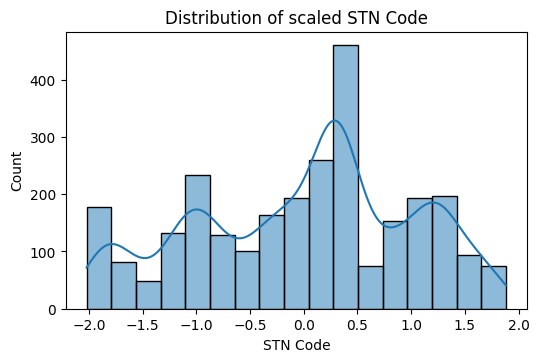

In [2]:
#!/usr/bin/env python
# Standard Scaling and Categorical Encoding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the preprocessed dataset
print("Loading preprocessed dataset...")
df = pd.read_csv("preprocessed_data.csv")

print("\nDataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Separate features for clustering
# Exclude non-numerical identifier columns and location-specific columns
exclude_cols = ['Name of Monitoring Location']
feature_cols = [col for col in df.columns if col not in exclude_cols]

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric columns ({len(numeric_cols)}):", numeric_cols)
print(f"\nCategorical columns ({len(categorical_cols)}):", categorical_cols)

# Create a copy of the dataframe with selected features
df_features = df[feature_cols].copy()

# Handle categorical variables
if categorical_cols:
    print("\nEncoding categorical variables...")
    
    # Method 1: Label Encoding (for ordinal categories or binary categories)
    label_encoders = {}
    for col in categorical_cols:
        if col in feature_cols:
            le = LabelEncoder()
            df_features[col] = le.fit_transform(df_features[col].astype(str))
            label_encoders[col] = le
            print(f"Label encoded {col}: {list(zip(le.classes_, le.transform(le.classes_)))}")
    
    # Method 2: One-Hot Encoding (for nominal categories with multiple levels)
    # If you prefer one-hot encoding, uncomment these lines and comment out the label encoding above
    # ohe_cols = [col for col in categorical_cols if col in feature_cols and df_features[col].nunique() > 2]
    # if ohe_cols:
    #     print(f"\nOne-hot encoding columns: {ohe_cols}")
    #     df_features = pd.get_dummies(df_features, columns=ohe_cols, drop_first=True)

# Scale numeric features
print("\nScaling numeric features...")
scaler = StandardScaler()
numeric_features = [col for col in numeric_cols if col in feature_cols]
if numeric_features:
    df_features[numeric_features] = scaler.fit_transform(df_features[numeric_features])
    print(f"Scaled {len(numeric_features)} numeric features using StandardScaler")

# Display summary statistics after scaling
print("\nSummary statistics after scaling and encoding:")
print(df_features.describe())

# Visualization: Distribution of scaled features
plt.figure(figsize=(15, 10))
numeric_features_sample = numeric_features[:min(9, len(numeric_features))]
for i, col in enumerate(numeric_features_sample):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_features[col], kde=True)
    plt.title(f'Distribution of scaled {col}')
    plt.tight_layout()
plt.savefig('scaled_features_distributions.png')
print("Scaled feature distributions saved to 'scaled_features_distributions.png'")

# Save the scaled and encoded dataset
df_features.to_csv("scaled_encoded_data.csv", index=False)
print("\nScaled and encoded data saved to 'scaled_encoded_data.csv'")

# Keep track of the original column names and their transformations
feature_info = {
    'original_columns': feature_cols,
    'numeric_columns': numeric_features,
    'categorical_columns': [col for col in categorical_cols if col in feature_cols]
}

# Save feature information for reference in later steps
import json
with open('feature_info.json', 'w') as f:
    json.dump(feature_info, f, indent=4)
print("Feature information saved to 'feature_info.json'")

print("\nScaling and encoding completed successfully!")

Loading scaled and encoded dataset...

Dataset shape: (2766, 19)

First few rows:
   STN Code  Type Water Body  State Name  Min Temperature  Max Temperature  \
0  1.757603                0           0               70               59   
1  0.999556                0           0               40               75   
2 -0.931500                0           0               97               75   
3  1.746103                0           0               79               59   
4 -1.471045                0           0               40               24   

   Min Dissolved Oxygen  Max Dissolved Oxygen  Min pH  Max pH  \
0                    42                   123      28      19   
1                    35                   147      29      26   
2                    37                   122      28      25   
3                    54                   119      23      18   
4                    60                   126      31      21   

   Min Conductivity  Max Conductivity  Min BOD  Max BOD  \

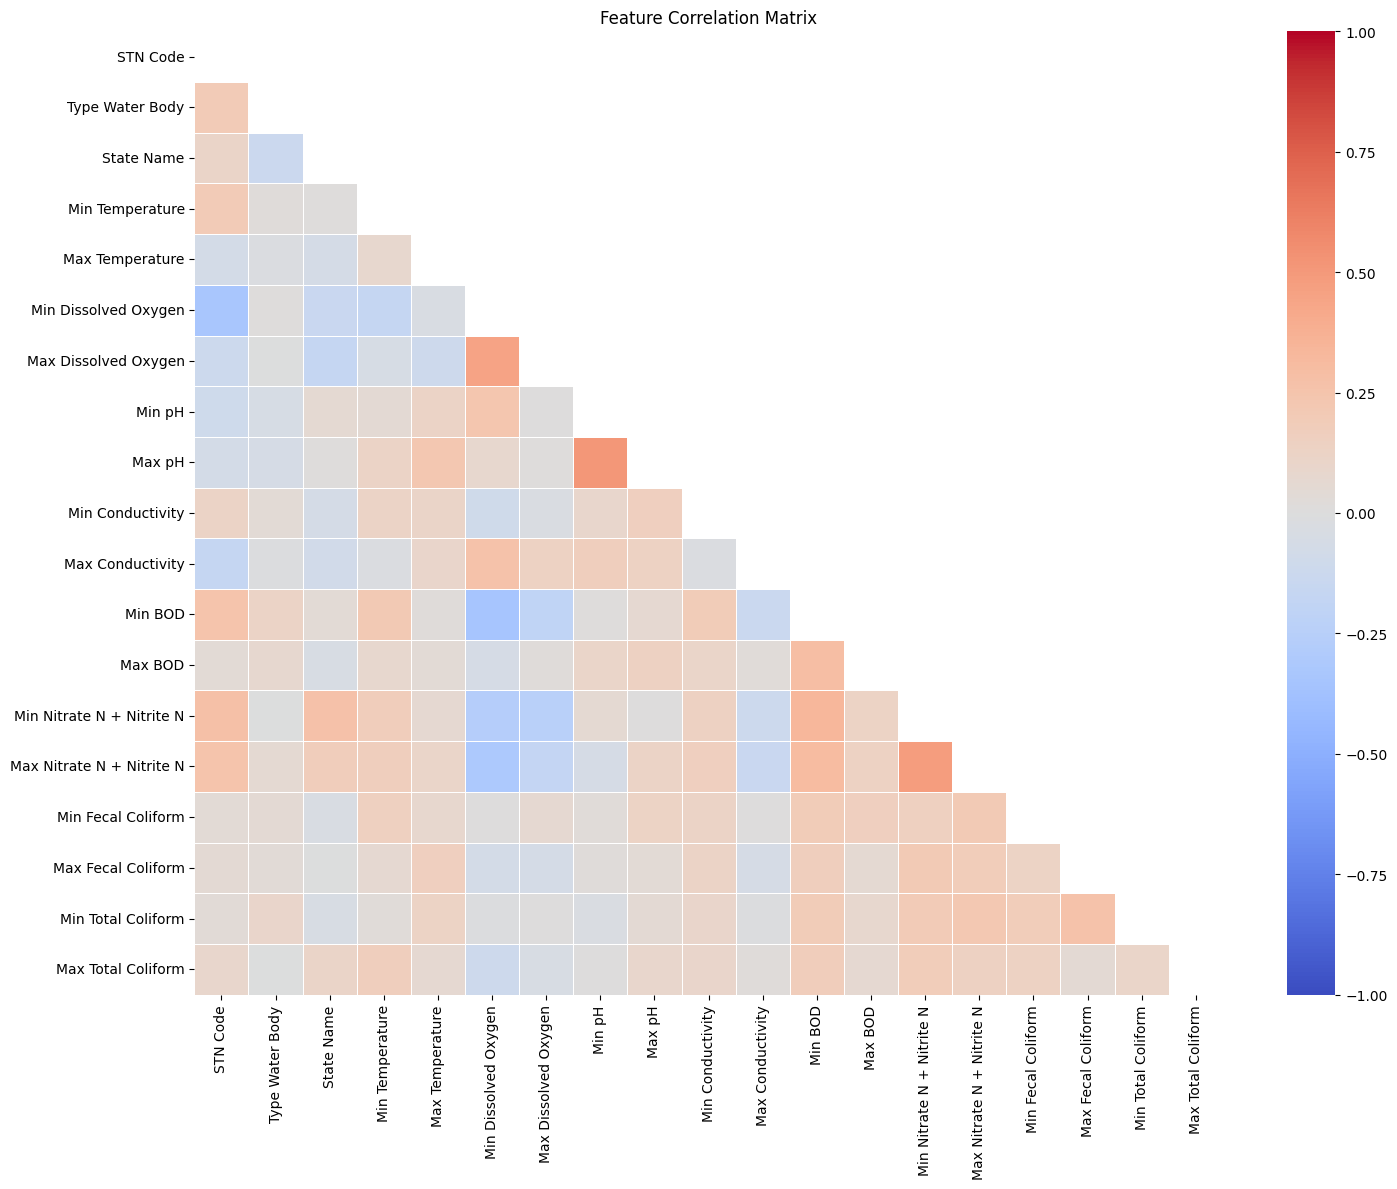

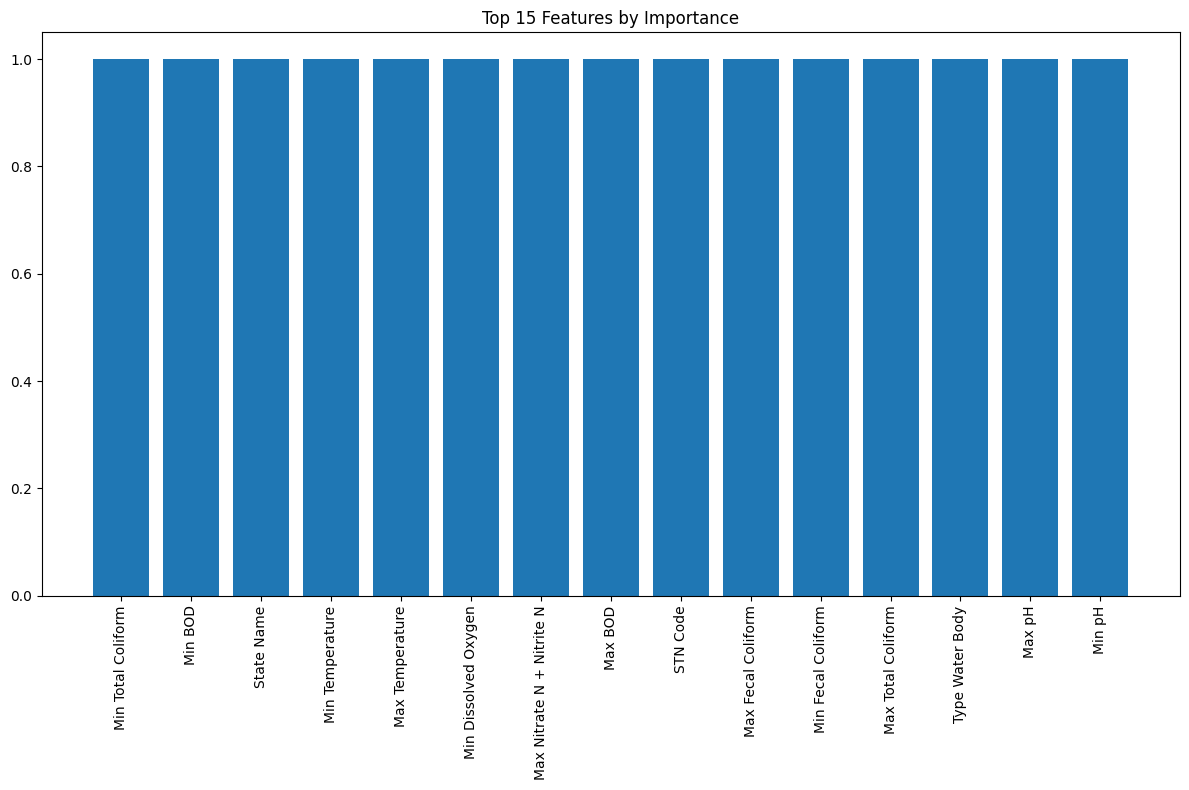

In [3]:
#!/usr/bin/env python
# Feature Selection: Identify the most important features for clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA
import json
import os

# Load the scaled and encoded dataset
print("Loading scaled and encoded dataset...")
df = pd.read_csv("scaled_encoded_data.csv")

print("\nDataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Step 1: Remove low-variance features
print("\nRemoving low-variance features...")
selector = VarianceThreshold(threshold=0.01)  # Features with a variance lower than 0.01 will be removed
X_var_selected = selector.fit_transform(df)
selected_features_mask = selector.get_support()
selected_features = df.columns[selected_features_mask].tolist()

print(f"Features after variance thresholding: {len(selected_features)} / {df.shape[1]}")
print("Removed features:", list(set(df.columns) - set(selected_features)))

# Create a dataframe with the selected features
df_var_selected = df[selected_features].copy()

# Step 2: Correlation analysis
print("\nPerforming correlation analysis...")
correlation_matrix = df_var_selected.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
print("Correlation matrix saved to 'correlation_matrix.png'")

# Identify highly correlated features (typically above 0.9)
# We'll keep only one feature from highly correlated pairs
high_corr_threshold = 0.9
high_corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            # Keep the feature with higher variance
            if df_var_selected[feature_i].var() < df_var_selected[feature_j].var():
                high_corr_features.add(feature_i)
            else:
                high_corr_features.add(feature_j)

print("\nHighly correlated features to remove:", high_corr_features)

# Remove highly correlated features
selected_features_uncorr = [f for f in selected_features if f not in high_corr_features]
df_selected = df_var_selected[selected_features_uncorr].copy()

print(f"Features after correlation analysis: {len(selected_features_uncorr)} / {len(selected_features)}")

# Step 3: PCA-based feature ranking (to understand feature importance)
print("\nCalculating feature importance using PCA...")
pca = PCA()
pca.fit(df_selected)

# Calculate the feature importances
feature_importance = np.abs(pca.components_)
feature_importance_norm = feature_importance / np.sum(feature_importance, axis=0)
importance_scores = np.sum(feature_importance_norm, axis=0)

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': df_selected.columns,
    'Importance': importance_scores
})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print("\nTop 10 features by importance:")
print(feature_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['Feature'][:15], feature_importance_df['Importance'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Features by Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Feature importance plot saved to 'feature_importance.png'")

# Step 4: Select the final set of features
# Let's choose the top K features based on importance
K = min(20, len(selected_features_uncorr))  # Limit to 20 features or less
top_features = feature_importance_df['Feature'][:K].tolist()

print(f"\nSelected top {K} features for clustering:")
for i, feature in enumerate(top_features, 1):
    importance = feature_importance_df.loc[feature_importance_df['Feature'] == feature, 'Importance'].values[0]
    print(f"{i}. {feature} (Importance: {importance:.4f})")

# Create the final dataset with selected features
df_final = df[top_features].copy()

# Save the feature-selected dataset
df_final.to_csv("feature_selected_data.csv", index=False)
print("\nFeature selected data saved to 'feature_selected_data.csv'")

# Save the feature selection information
selection_info = {
    'variance_threshold': 0.01,
    'correlation_threshold': high_corr_threshold,
    'features_after_variance_threshold': selected_features,
    'features_after_correlation_analysis': selected_features_uncorr,
    'final_selected_features': top_features
}

with open('feature_selection_info.json', 'w') as f:
    json.dump(selection_info, f, indent=4)
print("Feature selection information saved to 'feature_selection_info.json'")

print("\nFeature selection completed successfully!")

Loading feature-selected dataset...

Dataset shape: (2766, 19)

First few rows:
   Min Total Coliform  Min BOD  State Name  Min Temperature  Max Temperature  \
0                 253       34           0               70               59   
1                  80       36           0               40               75   
2                  47       79           0               97               75   
3                 190       34           0               79               59   
4                 237       83           0               40               24   

   Min Dissolved Oxygen  Max Nitrate N + Nitrite N  Max BOD  STN Code  \
0                    42                        652      224  1.757603   
1                    35                        384      330  0.999556   
2                    37                        356      275 -0.931500   
3                    54                        123      140  1.746103   
4                    60                        170      160 -1.471045   



/opt/homebrew/Caskroom/miniconda/base/envs/ml-asg/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ml-asg/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP transformed data saved to 'umap_transformed_data.csv'
UMAP visualization saved to 'umap_visualization.png'
Dimensionality reduction comparison saved to 'dimension_reduction_comparison.png'


TypeError: Object of type int64 is not JSON serializable

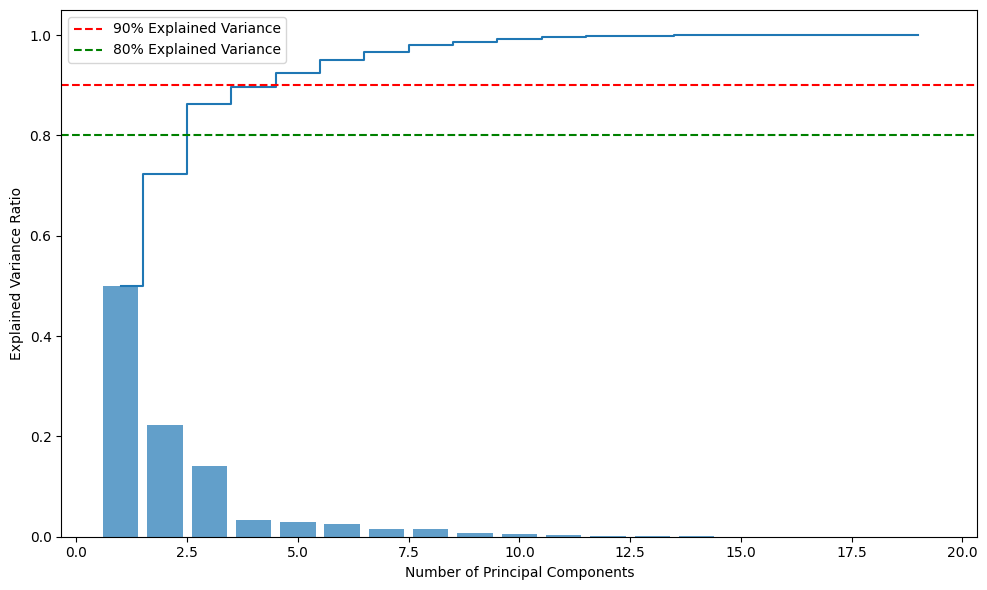

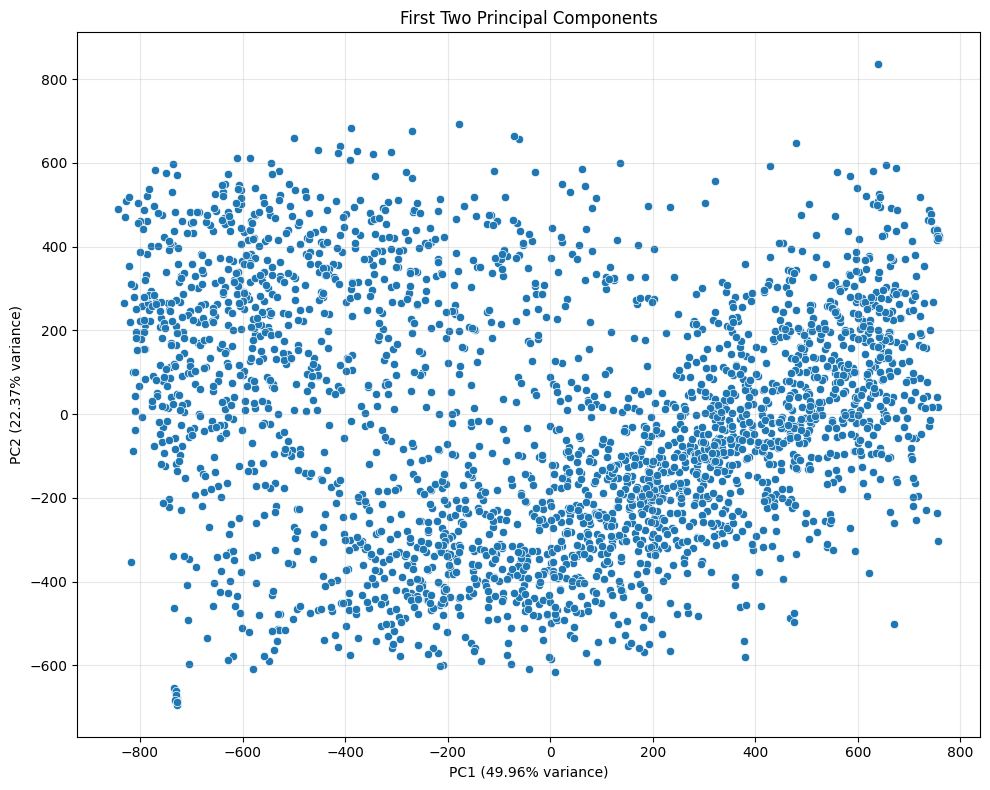

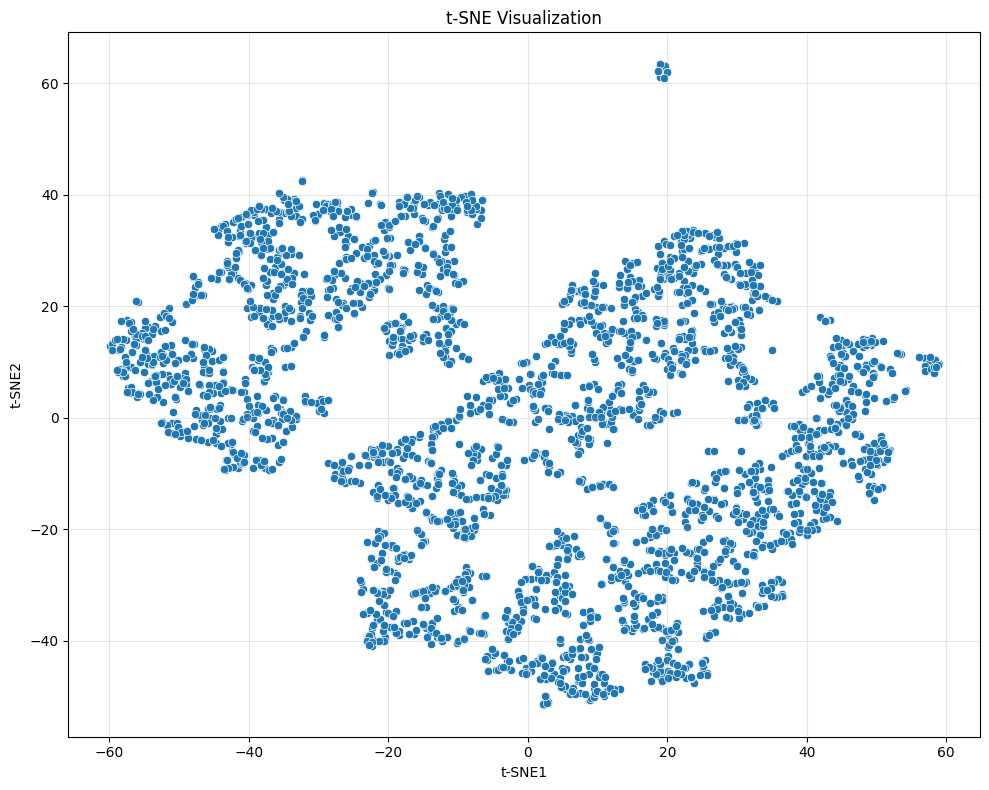

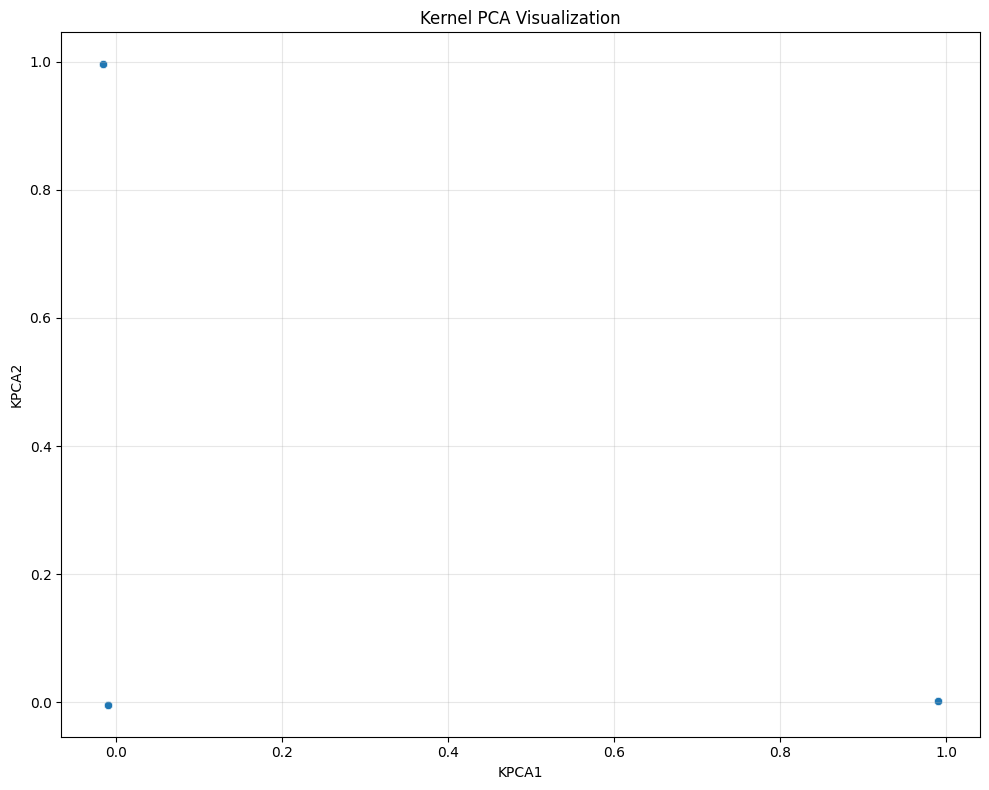

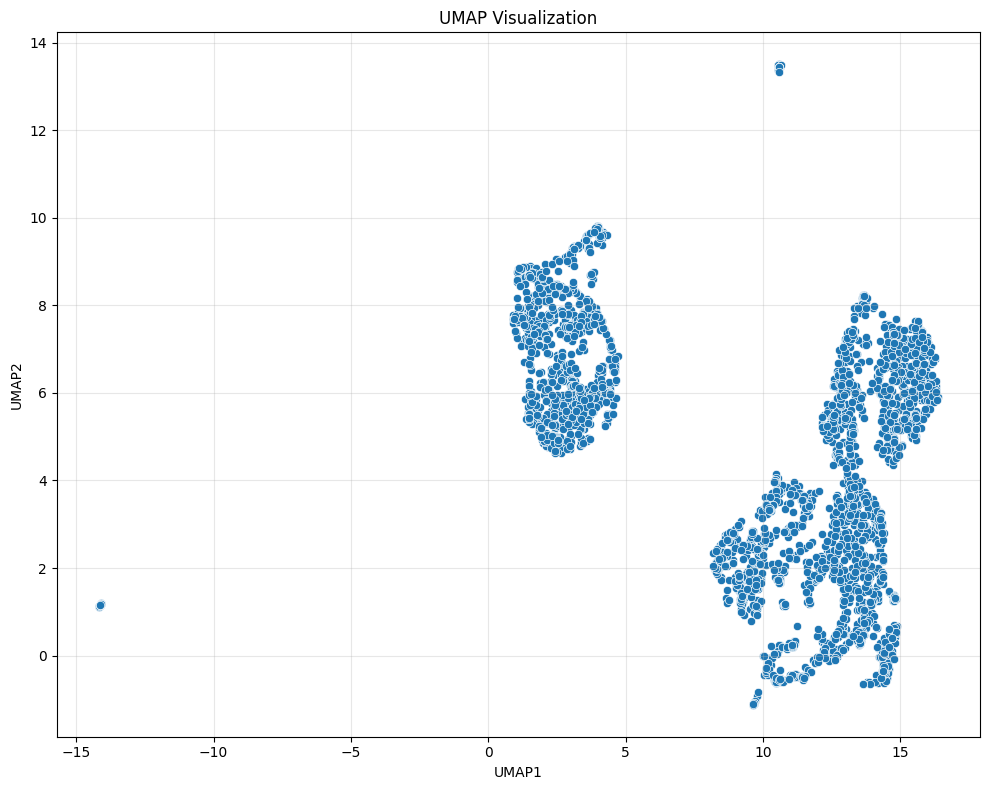

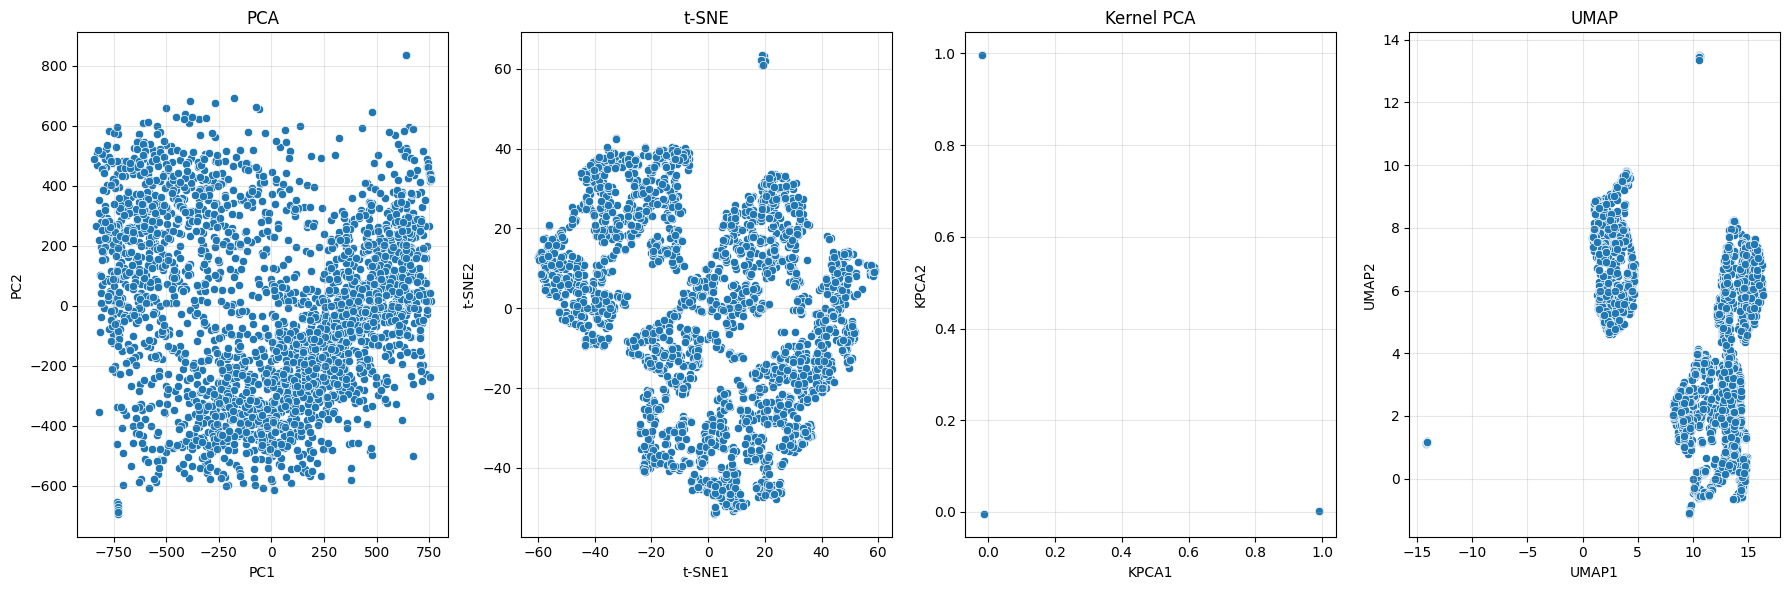

In [5]:
#!/usr/bin/env python
# Dimensionality Reduction: Reduce data to lower dimensions for visualization and clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import json
import os

# Add UMAP import
try:
    import umap
    has_umap = True
except ImportError:
    print("UMAP not installed. To install: pip install umap-learn")
    has_umap = False

# Load the feature-selected dataset
print("Loading feature-selected dataset...")
df = pd.read_csv("feature_selected_data.csv")

print("\nDataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Step 1: PCA for Dimensionality Reduction
print("\nPerforming PCA (Principal Component Analysis)...")
pca = PCA()
pca_result = pca.fit_transform(df)

# Compute explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Determine how many components to keep to explain at least 90% of variance
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1

print(f"\nNumber of components to explain 80% variance: {n_components_80}")
print(f"Number of components to explain 90% variance: {n_components_90}")

# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.8, color='g', linestyle='--', label='80% Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.tight_layout()
plt.savefig('pca_explained_variance.png')
print("PCA explained variance plot saved to 'pca_explained_variance.png'")

# Step 2: Apply PCA with the selected number of components (using 90% threshold)
n_components = min(n_components_90, 10)  # Limit to 10 components max for practical purposes
print(f"\nReducing dimensions to {n_components} components...")

pca_final = PCA(n_components=n_components)
pca_result_final = pca_final.fit_transform(df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(
    data=pca_result_final,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# Save the PCA-transformed dataset
pca_df.to_csv("pca_transformed_data.csv", index=False)
print("PCA-transformed data saved to 'pca_transformed_data.csv'")

# Visualize the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('First Two Principal Components')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_visualization.png')
print("PCA visualization saved to 'pca_visualization.png'")

# Step 3: Try alternative method - t-SNE for non-linear dimensionality reduction
print("\nPerforming t-SNE (t-Distributed Stochastic Neighbor Embedding)...")
# t-SNE is computationally intensive, so we'll use PCA first to reduce dimensions if dataset is large
use_tsne = True
if df.shape[0] > 1000 or df.shape[1] > 50:
    print("Dataset is large, using PCA result as input to t-SNE")
    tsne_input = pca_result_final
else:
    tsne_input = df.values

# Apply t-SNE
try:
    tsne = TSNE(n_components=2, perplexity=min(30, df.shape[0]//5), random_state=42)
    tsne_result = tsne.fit_transform(tsne_input)
    
    # Create a DataFrame with t-SNE results
    tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
    
    # Save t-SNE results
    tsne_df.to_csv("tsne_transformed_data.csv", index=False)
    print("t-SNE transformed data saved to 'tsne_transformed_data.csv'")
    
    # Visualize t-SNE results
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='t-SNE1', y='t-SNE2', data=tsne_df)
    plt.title('t-SNE Visualization')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('tsne_visualization.png')
    print("t-SNE visualization saved to 'tsne_visualization.png'")
    
    use_tsne = True
except Exception as e:
    print(f"Error during t-SNE: {e}")
    print("Skipping t-SNE visualization")
    use_tsne = False

# Step 4: Try Kernel PCA for potentially better separation
print("\nPerforming Kernel PCA...")
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
kpca_result = kpca.fit_transform(df)

# Create a DataFrame with Kernel PCA results
kpca_df = pd.DataFrame(data=kpca_result, columns=['KPCA1', 'KPCA2'])

# Save Kernel PCA results
kpca_df.to_csv("kpca_transformed_data.csv", index=False)
print("Kernel PCA transformed data saved to 'kpca_transformed_data.csv'")

# Visualize Kernel PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='KPCA1', y='KPCA2', data=kpca_df)
plt.title('Kernel PCA Visualization')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kpca_visualization.png')
print("Kernel PCA visualization saved to 'kpca_visualization.png'")

# Step 5: Try UMAP for dimensionality reduction
print("\nPerforming UMAP (Uniform Manifold Approximation and Projection)...")
use_umap = has_umap

if has_umap:
    try:
        # Apply UMAP
        umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
        umap_result = umap_reducer.fit_transform(df)
        
        # Create a DataFrame with UMAP results
        umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
        
        # Save UMAP results
        umap_df.to_csv("umap_transformed_data.csv", index=False)
        print("UMAP transformed data saved to 'umap_transformed_data.csv'")
        
        # Visualize UMAP results
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df)
        plt.title('UMAP Visualization')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('umap_visualization.png')
        print("UMAP visualization saved to 'umap_visualization.png'")
        
        use_umap = True
    except Exception as e:
        print(f"Error during UMAP: {e}")
        print("Skipping UMAP visualization")
        use_umap = False
else:
    print("UMAP not available, skipping UMAP reduction")
    use_umap = False

# Combine all visualization methods for comparison
fig_width = 18 if use_tsne and use_umap else 15 if (use_tsne or use_umap) else 12
plt.figure(figsize=(fig_width, 6))

# Determine number of subplots
n_plots = 1 + use_tsne + 1 + use_umap  # PCA + t-SNE (if used) + KPCA + UMAP (if used)

# PCA subplot
plt.subplot(1, n_plots, 1)
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA')
plt.grid(True, alpha=0.3)

# Current subplot position
current_plot = 2

# t-SNE subplot
if use_tsne:
    plt.subplot(1, n_plots, current_plot)
    sns.scatterplot(x='t-SNE1', y='t-SNE2', data=tsne_df)
    plt.title('t-SNE')
    plt.grid(True, alpha=0.3)
    current_plot += 1

# Kernel PCA subplot
plt.subplot(1, n_plots, current_plot)
sns.scatterplot(x='KPCA1', y='KPCA2', data=kpca_df)
plt.title('Kernel PCA')
plt.grid(True, alpha=0.3)
current_plot += 1

# UMAP subplot
if use_umap:
    plt.subplot(1, n_plots, current_plot)
    sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df)
    plt.title('UMAP')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dimension_reduction_comparison.png')
print("Dimensionality reduction comparison saved to 'dimension_reduction_comparison.png'")

# Save the dimensionality reduction information
reduction_info = {
    'pca': {
        'n_components': n_components,
        'explained_variance_ratio': explained_variance.tolist(),
        'cumulative_variance': cumulative_variance.tolist()
    },
    'used_tsne': use_tsne,
    'kernel_pca': {
        'kernel': 'rbf',
        'gamma': 10
    },
    'used_umap': use_umap,
    'umap': {
        'n_neighbors': 15,
        'min_dist': 0.1,
        'n_components': 2
    } if use_umap else {}
}

with open('dimensionality_reduction_info.json', 'w') as f:
    json.dump(reduction_info, f, indent=4)
print("Dimensionality reduction information saved to 'dimensionality_reduction_info.json'")

print("\nDimensionality reduction completed successfully!") 

Loading reduced datasets...
PCA data shape: (2766, 5)
t-SNE data shape: (2766, 2)
Kernel PCA data shape: (2766, 2)
UMAP data shape: (2766, 2)
Finding optimal number of clusters...
Clusters: 2, Silhouette: 0.360, CH: 1915.7, DB: 1.140
Clusters: 3, Silhouette: 0.327, CH: 1792.7, DB: 1.109
Clusters: 4, Silhouette: 0.279, CH: 1560.0, DB: 1.218
Clusters: 5, Silhouette: 0.272, CH: 1403.0, DB: 1.237
Clusters: 6, Silhouette: 0.250, CH: 1312.2, DB: 1.328
Clusters: 7, Silhouette: 0.247, CH: 1225.8, DB: 1.335
Clusters: 8, Silhouette: 0.251, CH: 1171.5, DB: 1.266
Clusters: 9, Silhouette: 0.250, CH: 1128.2, DB: 1.257
Clusters: 10, Silhouette: 0.236, CH: 1085.0, DB: 1.227
Cluster evaluation metrics saved to 'cluster_evaluation_metrics.png'
Best number of clusters (Silhouette): 2
Best number of clusters (Calinski-Harabasz): 2
Best number of clusters (Davies-Bouldin): 3
Consensus optimal number of clusters: 2

Applying clustering algorithms on PCA data with 2 clusters...
Clustering results saved to 'P

/var/folders/0l/mrtqnjts01v_48lkl9674g3r0000gn/T/ipykernel_29094/977383605.py:252: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


Clustering results saved to 't-SNE_clustering_results.png'

Clustering Evaluation Metrics:
Kmeans: Silhouette=0.429, CH=2499.9, DB=0.902
Agglomerative: Silhouette=0.428, CH=2357.8, DB=0.844
Gmm: Silhouette=0.425, CH=2312.3, DB=0.838
Dbscan: Metrics not available

Applying clustering algorithms on Kernel_PCA data with 2 clusters...


InvalidParameterError: The 'eps' parameter of DBSCAN must be a float in the range (0.0, inf). Got 0.0 instead.

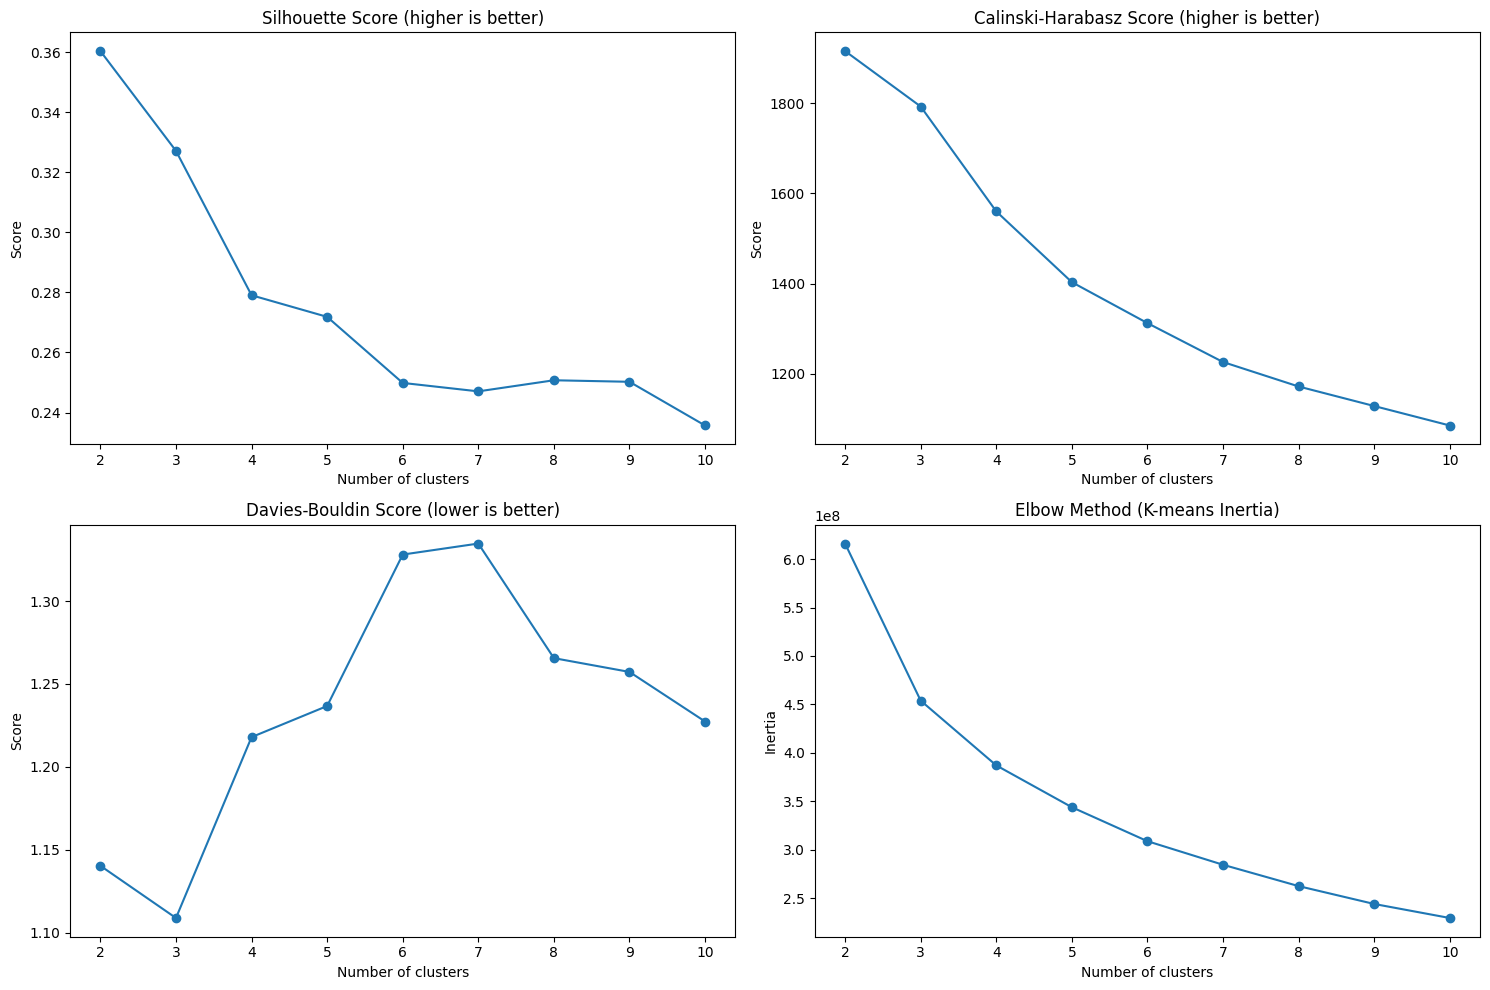

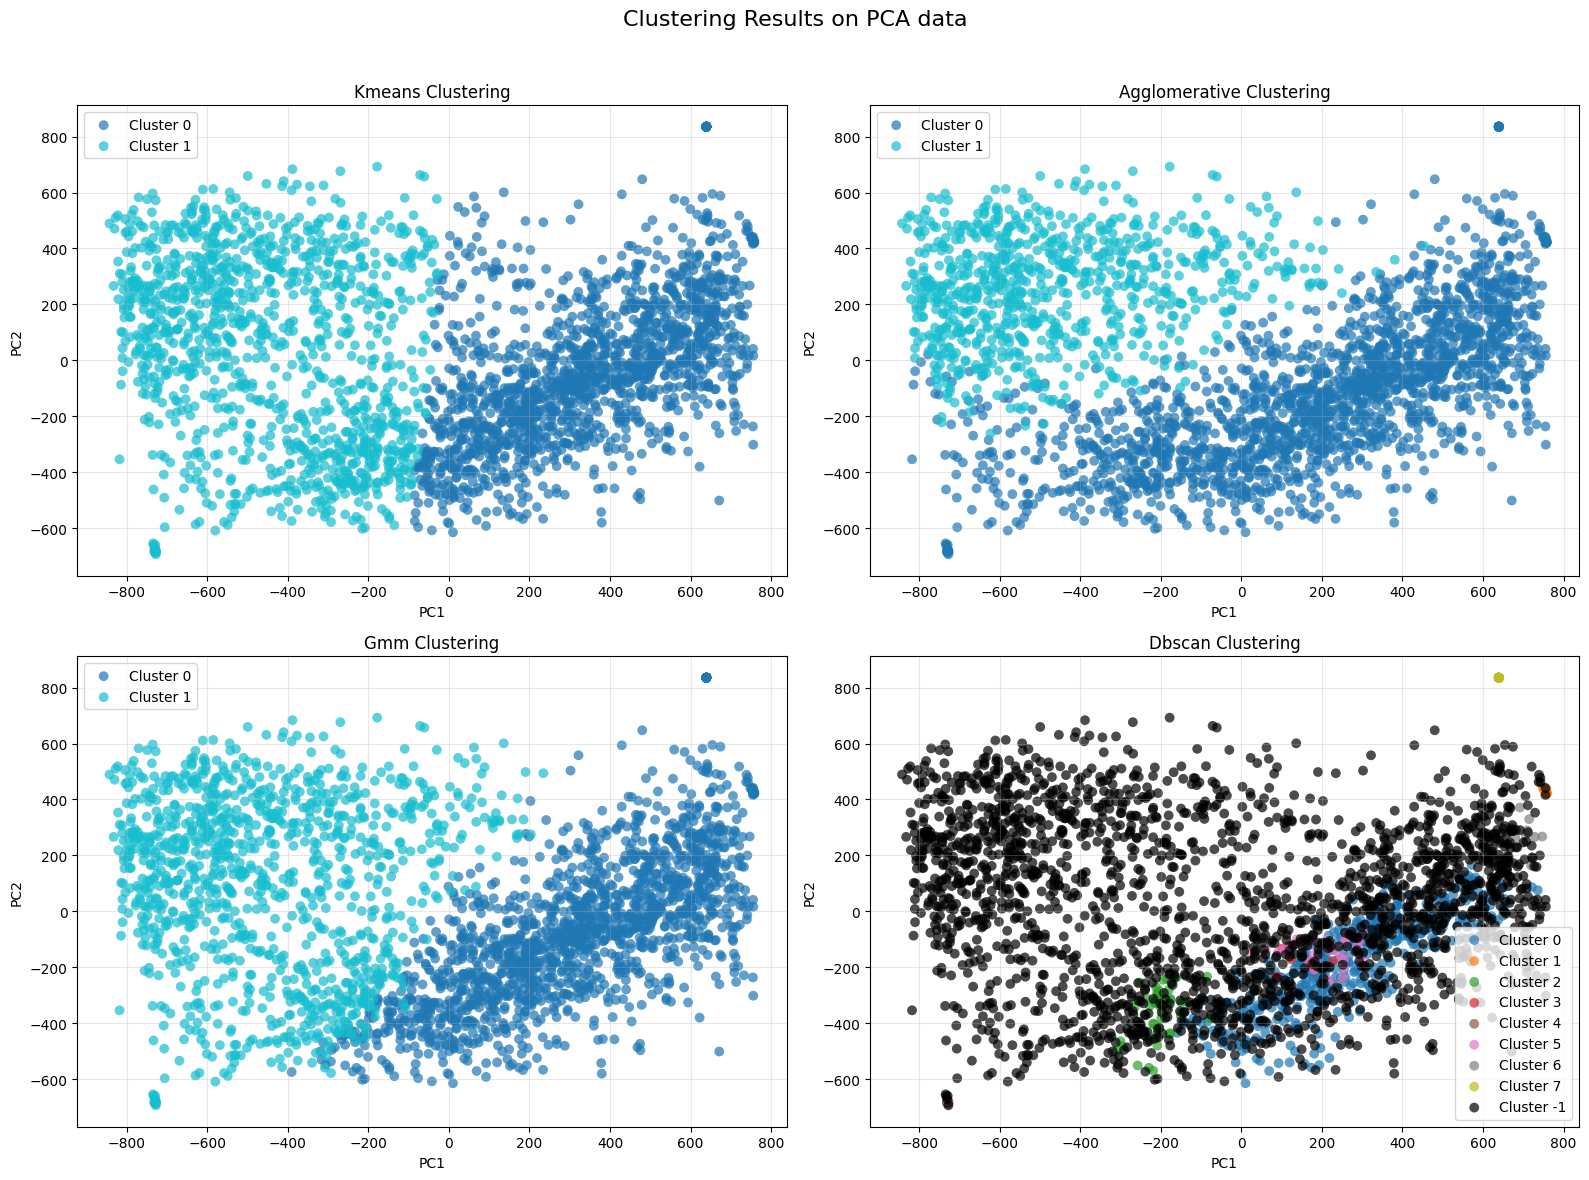

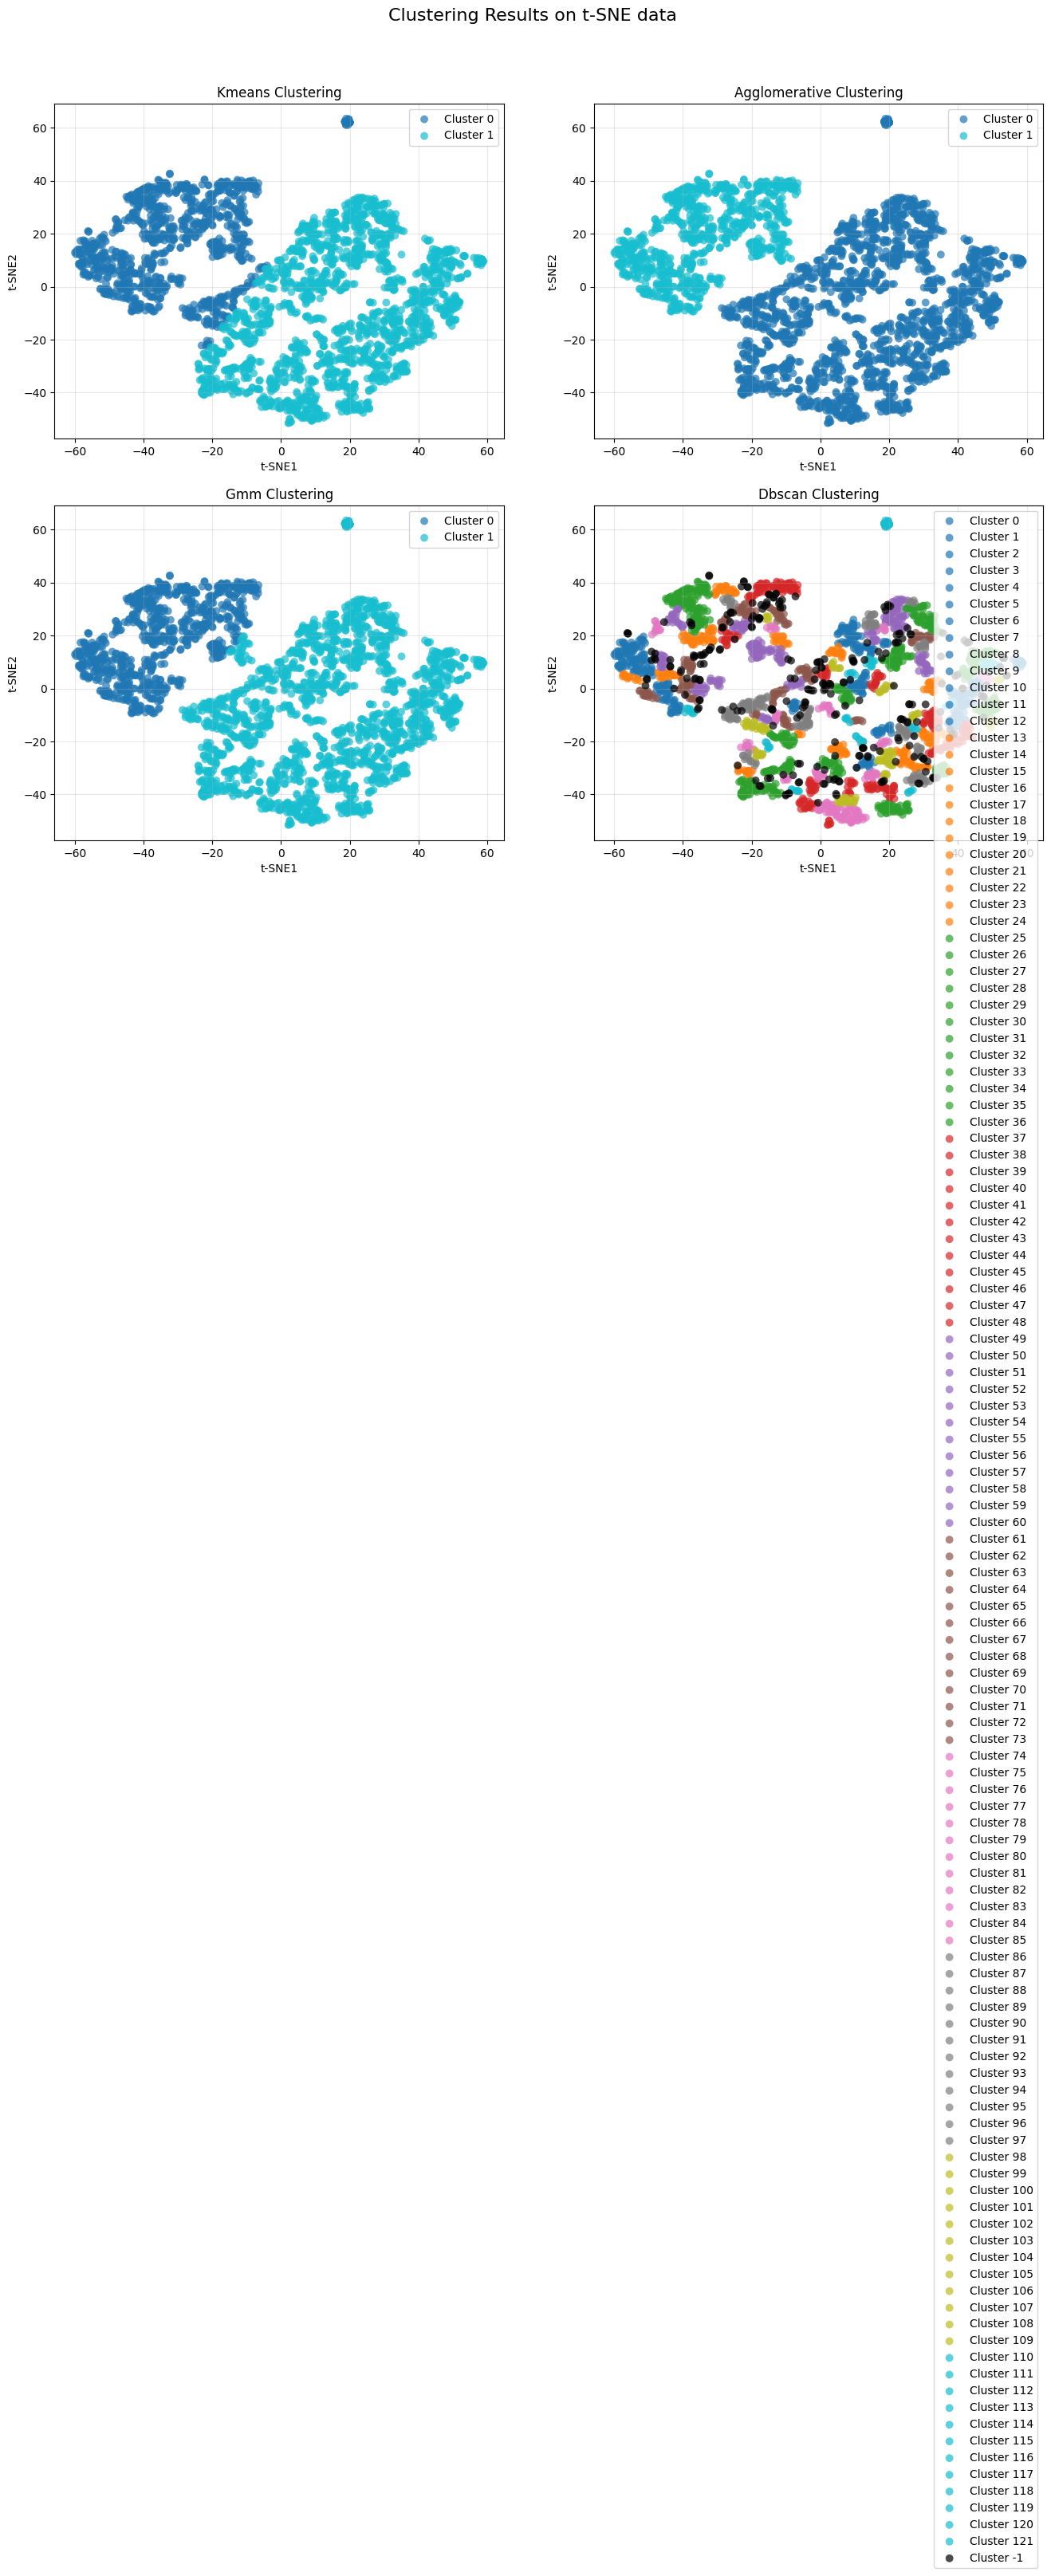

In [6]:
#!/usr/bin/env python
# Clustering: Apply various clustering algorithms and evaluate results

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import json
import os

# Load the reduced datasets
print("Loading reduced datasets...")

# Load PCA data
pca_df = pd.read_csv("pca_transformed_data.csv")
print("PCA data shape:", pca_df.shape)

# Try to load other dimensionality reduction results
try:
    tsne_df = pd.read_csv("tsne_transformed_data.csv")
    has_tsne = True
    print("t-SNE data shape:", tsne_df.shape)
except:
    has_tsne = False
    print("t-SNE data not available")

try:
    kpca_df = pd.read_csv("kpca_transformed_data.csv")
    has_kpca = True
    print("Kernel PCA data shape:", kpca_df.shape)
except:
    has_kpca = False
    print("Kernel PCA data not available")

try:
    umap_df = pd.read_csv("umap_transformed_data.csv")
    has_umap = True
    print("UMAP data shape:", umap_df.shape)
except:
    has_umap = False
    print("UMAP data not available")

# Function to determine optimal number of clusters using various metrics
def find_optimal_clusters(data, max_clusters=10):
    """
    Determines the optimal number of clusters using multiple evaluation metrics.
    """
    print("Finding optimal number of clusters...")
    
    # Initialize metrics
    silhouette_scores = []
    ch_scores = []
    db_scores = []
    inertia_values = []  # For Elbow method
    
    range_n_clusters = range(2, min(max_clusters + 1, len(data)))
    
    for n_clusters in range_n_clusters:
        # KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        
        # Silhouette score (higher is better)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
        # Calinski-Harabasz Index (higher is better)
        ch_score = calinski_harabasz_score(data, cluster_labels)
        ch_scores.append(ch_score)
        
        # Davies-Bouldin Index (lower is better)
        db_score = davies_bouldin_score(data, cluster_labels)
        db_scores.append(db_score)
        
        # Inertia (within-cluster sum of squares) for Elbow method
        inertia_values.append(kmeans.inertia_)
        
        print(f"Clusters: {n_clusters}, Silhouette: {silhouette_avg:.3f}, CH: {ch_score:.1f}, DB: {db_score:.3f}")
    
    # Visualize metrics
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Silhouette score (higher is better)
    ax1.plot(range_n_clusters, silhouette_scores, 'o-')
    ax1.set_title('Silhouette Score (higher is better)')
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('Score')
    
    # Calinski-Harabasz Index (higher is better)
    ax2.plot(range_n_clusters, ch_scores, 'o-')
    ax2.set_title('Calinski-Harabasz Score (higher is better)')
    ax2.set_xlabel('Number of clusters')
    ax2.set_ylabel('Score')
    
    # Davies-Bouldin Index (lower is better)
    ax3.plot(range_n_clusters, db_scores, 'o-')
    ax3.set_title('Davies-Bouldin Score (lower is better)')
    ax3.set_xlabel('Number of clusters')
    ax3.set_ylabel('Score')
    
    # Elbow Method (look for the "elbow" point)
    ax4.plot(range_n_clusters, inertia_values, 'o-')
    ax4.set_title('Elbow Method (K-means Inertia)')
    ax4.set_xlabel('Number of clusters')
    ax4.set_ylabel('Inertia')
    
    plt.tight_layout()
    plt.savefig('cluster_evaluation_metrics.png')
    print("Cluster evaluation metrics saved to 'cluster_evaluation_metrics.png'")
    
    # Suggest optimal number of clusters based on metrics
    best_silhouette_idx = np.argmax(silhouette_scores)
    best_ch_idx = np.argmax(ch_scores)
    best_db_idx = np.argmin(db_scores)
    
    # Convert to actual cluster numbers
    best_silhouette = list(range_n_clusters)[best_silhouette_idx]
    best_ch = list(range_n_clusters)[best_ch_idx]
    best_db = list(range_n_clusters)[best_db_idx]
    
    print(f"Best number of clusters (Silhouette): {best_silhouette}")
    print(f"Best number of clusters (Calinski-Harabasz): {best_ch}")
    print(f"Best number of clusters (Davies-Bouldin): {best_db}")
    
    # Determine consensus optimal number of clusters
    # One simple approach is to take the mode of the three metrics
    optimal_clusters = [best_silhouette, best_ch, best_db]
    from collections import Counter
    counter = Counter(optimal_clusters)
    consensus = counter.most_common(1)[0][0]
    print(f"Consensus optimal number of clusters: {consensus}")
    
    return {
        'silhouette_scores': silhouette_scores,
        'calinski_harabasz_scores': ch_scores,
        'davies_bouldin_scores': db_scores,
        'inertia_values': inertia_values,
        'best_silhouette': best_silhouette,
        'best_ch': best_ch,
        'best_db': best_db,
        'consensus': consensus
    }

# Function to apply and visualize clustering algorithms
def apply_clustering(data, n_clusters, data_name):
    """
    Apply various clustering algorithms and visualize results.
    """
    print(f"\nApplying clustering algorithms on {data_name} data with {n_clusters} clusters...")
    
    results = {}
    
    # 1. K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(data)
    results['kmeans'] = kmeans_labels
    
    # 2. Agglomerative (Hierarchical) clustering
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg.fit_predict(data)
    results['agglomerative'] = agg_labels
    
    # 3. Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(data)
    results['gmm'] = gmm_labels
    
    # 4. DBSCAN
    # For DBSCAN, we need to determine eps (neighborhood size)
    # Let's use a heuristic approach: sort distances to k-nearest neighbors
    from sklearn.neighbors import NearestNeighbors
    neigh = NearestNeighbors(n_neighbors=min(10, len(data)-1))
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances[:, -1])  # Get the distance to the kth nearest neighbor
    
    # Use the knee point as eps (you might need to adjust)
    knee_point_idx = len(distances) // 10  # This is a heuristic
    eps = distances[knee_point_idx]
    
    dbscan = DBSCAN(eps=eps, min_samples=max(5, data.shape[1] * 2))
    dbscan_labels = dbscan.fit_predict(data)
    results['dbscan'] = dbscan_labels
    
    # Compute evaluation metrics for each algorithm
    metrics = {}
    
    # Handle DBSCAN's possible noise points (label -1)
    dbscan_labels_filtered = dbscan_labels.copy()
    has_noise = -1 in dbscan_labels
    
    for name, labels in results.items():
        if name == 'dbscan' and has_noise:
            # Skip metric calculation for DBSCAN if there are noise points (label -1)
            metrics[name] = {
                'silhouette': None,
                'calinski_harabasz': None,
                'davies_bouldin': None,
                'n_clusters': len(set(labels)) - (1 if has_noise else 0),
                'has_noise': has_noise
            }
        else:
            # Ensure we have more than one cluster for metric calculation
            n_unique_labels = len(set(labels))
            if n_unique_labels > 1:
                metrics[name] = {
                    'silhouette': silhouette_score(data, labels),
                    'calinski_harabasz': calinski_harabasz_score(data, labels),
                    'davies_bouldin': davies_bouldin_score(data, labels),
                    'n_clusters': n_unique_labels,
                    'has_noise': False
                }
            else:
                metrics[name] = {
                    'silhouette': None,
                    'calinski_harabasz': None,
                    'davies_bouldin': None,
                    'n_clusters': n_unique_labels,
                    'has_noise': False
                }
    
    # Create visualization for each algorithm
    if data.shape[1] >= 2:  # Need at least 2 dimensions for visualization
        plt.figure(figsize=(16, 12))
        plt.suptitle(f'Clustering Results on {data_name} data', fontsize=16)
        
        for i, (name, labels) in enumerate(results.items()):
            plt.subplot(2, 2, i+1)
            
            # For visualization, we'll use the first two dimensions
            x_col, y_col = data.columns[0], data.columns[1]
            
            # Create scatter plot with cluster colors
            unique_labels = set(labels)
            colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
            
            for j, label in enumerate(unique_labels):
                color = 'k' if label == -1 else colors[j]
                mask = labels == label
                plt.scatter(data[x_col][mask], data[y_col][mask], 
                            c=[color], alpha=0.7, s=50, edgecolors='none', label=f'Cluster {label}')
            
            plt.title(f'{name.capitalize()} Clustering')
            plt.xlabel(x_col)
            plt.ylabel(y_col)
            plt.legend()
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.savefig(f'{data_name}_clustering_results.png')
        print(f"Clustering results saved to '{data_name}_clustering_results.png'")
    
    # Print evaluation metrics
    print("\nClustering Evaluation Metrics:")
    for name, metric in metrics.items():
        if metric['silhouette'] is not None:
            print(f"{name.capitalize()}: Silhouette={metric['silhouette']:.3f}, "
                  f"CH={metric['calinski_harabasz']:.1f}, DB={metric['davies_bouldin']:.3f}")
        else:
            print(f"{name.capitalize()}: Metrics not available")
    
    return results, metrics

# Main clustering analysis
# We'll use PCA as our primary dataset for finding optimal clusters
optimal_clusters_info = find_optimal_clusters(pca_df, max_clusters=10)
optimal_n_clusters = optimal_clusters_info['consensus']

# Apply clustering to all dimensionality reduction results
clustering_results = {}
clustering_metrics = {}

# PCA clustering
pca_results, pca_metrics = apply_clustering(pca_df, optimal_n_clusters, 'PCA')
clustering_results['pca'] = pca_results
clustering_metrics['pca'] = pca_metrics

# t-SNE clustering (if available)
if has_tsne:
    tsne_results, tsne_metrics = apply_clustering(tsne_df, optimal_n_clusters, 't-SNE')
    clustering_results['tsne'] = tsne_results
    clustering_metrics['tsne'] = tsne_metrics

# Kernel PCA clustering (if available)
if has_kpca:
    kpca_results, kpca_metrics = apply_clustering(kpca_df, optimal_n_clusters, 'Kernel_PCA')
    clustering_results['kpca'] = kpca_results
    clustering_metrics['kpca'] = kpca_metrics

# UMAP clustering (if available)
if has_umap:
    umap_results, umap_metrics = apply_clustering(umap_df, optimal_n_clusters, 'UMAP')
    clustering_results['umap'] = umap_results
    clustering_metrics['umap'] = umap_metrics

# Determine the best clustering approach based on metrics
print("\nDetermining best clustering approach...")
best_silhouette = -1
best_algorithm = None
best_data = None

for data_name, metrics in clustering_metrics.items():
    for algo_name, metric_values in metrics.items():
        if metric_values['silhouette'] is not None and metric_values['silhouette'] > best_silhouette:
            best_silhouette = metric_values['silhouette']
            best_algorithm = algo_name
            best_data = data_name

if best_algorithm and best_data:
    print(f"Best clustering approach: {best_algorithm.capitalize()} on {best_data.upper()} data")
    print(f"Silhouette score: {best_silhouette:.3f}")
else:
    print("Could not determine best clustering approach.")

# Save clustering information
clustering_info = {
    'optimal_clusters': optimal_n_clusters,
    'clustering_metrics': clustering_metrics,
    'best_clustering': {
        'algorithm': best_algorithm,
        'data': best_data,
        'silhouette': best_silhouette
    }
}

with open('clustering_info.json', 'w') as f:
    json.dump(clustering_info, f, indent=4)
print("Clustering information saved to 'clustering_info.json'")

print("\nClustering analysis completed successfully!")